In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')
pivot_df1 = pd.read_csv('../DataOut/Clusters/norm_cluster_cluster_percentages.csv')
pivot_df2 = pd.read_csv('../DataOut/Clusters/TScluster_PCA_cluster_percentages.csv')
pivot_df3 = pd.read_csv('../DataOut/Clusters/TScluster_DTW_cluster_percentages.csv')
pivot_df4 = pd.read_csv('../DataOut/Clusters/TScluster_cluster_percentages.csv')
pivot_df5 =pd.read_csv('../DataOut/Clusters/TScluster_SDTW_cluster_percentages.csv')
pivot_df6 = pd.read_csv('../DataOut/Clusters/Normcluster_new_cluster_percentages.csv')

pivot_dfs=[[pivot_df1,'NormCluster'],[pivot_df2,'TSclusters km pca'],[pivot_df3,'TSclusters withdtw'],[pivot_df4,'TSclusters no dtw'],[pivot_df5,'TScluster_SDTW'],[pivot_df6,'NormCluster_new']]

In [3]:
# # drop raws after 	'2022-11-01' from df
df = df[df['date']<='2022-11-01']

In [4]:
df.head(50)

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,...,rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,...,96.0,96.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,...,247.0,247.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,...,69.0,506.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,...,210.0,69.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,...,496.0,210.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,0.0
5,4890.0,262.0,1.0,6.0,2021-10-01,07:02:27,07:05:57,0 days 00:03:30,210.0,1.3125,...,195.0,496.0,7.0,1.0,10.0,20.7,0.000,6.8,Partially cloudy,211.0
6,4890.0,262.0,1.0,7.0,2021-10-01,07:06:32,07:07:17,0 days 00:00:45,45.0,0.3713,...,97.0,195.0,7.0,1.0,10.0,20.7,0.000,6.8,Partially cloudy,35.0
7,4890.0,262.0,1.0,8.0,2021-10-01,07:07:42,07:09:21,0 days 00:01:39,99.0,0.6245,...,210.0,97.0,7.0,1.0,10.0,20.7,0.000,6.8,Partially cloudy,25.0
8,4890.0,262.0,1.0,9.0,2021-10-01,07:09:44,07:10:18,0 days 00:00:34,34.0,0.2572,...,45.0,210.0,7.0,1.0,10.0,20.7,0.000,6.8,Partially cloudy,23.0
9,4890.0,262.0,1.0,10.0,2021-10-01,07:11:02,07:13:31,0 days 00:02:29,149.0,1.2349,...,99.0,45.0,7.0,1.0,10.0,20.7,0.000,6.8,Partially cloudy,44.0


In [5]:
pivot_dfs

[[   deviceid  Cluster_2.0  Cluster_1.0  Cluster_3.0  Cluster_0.0
  0       116           83          6.0          6.0            5
  1       117           62          1.0          0.0           37
  2       121           53         10.0          1.0           36
  3       123           34         11.0          0.0           55
  4       128           42          7.0          0.0           51
  5       209           25          0.0          0.0           75
  6       250           49          4.0          0.0           47
  7       262           48          4.0          0.0           48,
  'NormCluster'],
 [   deviceid  Cluster_3.0  Cluster_2.0  Cluster_0.0  Cluster_1.0
  0       116           32           30         21.0         18.0
  1       117           36           34         15.0         15.0
  2       121           24           41         10.0         25.0
  3       123           19           31         12.0         38.0
  4       128           33           26         27.0     

In [6]:
# show all the columns in pandas dataframes
pd.set_option('display.max_columns', None)

In [7]:
df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
150702,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
150703,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
150704,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [8]:
# # get raws where year is 2022 and moth is 10 and day higher than 1, this has seperate columns for year,mont,day
# df[(df['year']==2022) & (df['month']==10) & (df['day']>1)]

# print raws when date is afeter 2022-10-31
df[df['date'] > '2022-10-01']

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
109260,12475.0,1166.0,1.0,1.0,2022-10-02,06:41:37,06:44:22,0:02:45,165.0,0.63,6.0,6.50,1.0,0,0,37.0,113.0,106.0,102.0,113.0,113.0,113.0,113.0,113.0,6.0,2.0,10.0,19.1,0.0,10.4,Overcast,0.0
109261,12475.0,1166.0,1.0,2.0,2022-10-02,06:47:52,06:51:50,0:03:58,238.0,1.28,6.0,6.75,1.0,0,0,37.0,276.0,373.0,276.0,276.0,276.0,165.0,276.0,276.0,6.0,2.0,10.0,19.1,0.0,10.4,Overcast,210.0
109262,12475.0,1166.0,1.0,3.0,2022-10-02,06:51:50,07:00:12,0:08:22,502.0,2.11,6.0,6.75,1.0,0,0,37.0,546.0,476.0,578.0,546.0,546.0,238.0,165.0,546.0,6.0,2.0,10.0,19.1,0.0,10.4,Overcast,0.0
109263,12475.0,1166.0,1.0,4.0,2022-10-02,07:00:27,07:03:10,0:02:43,163.0,1.55,6.0,7.00,1.0,0,0,37.0,204.0,223.0,204.0,204.0,204.0,502.0,238.0,165.0,7.0,2.0,10.0,19.5,0.0,10.4,Overcast,15.0
109264,12475.0,1166.0,1.0,5.0,2022-10-02,07:03:10,07:04:55,0:01:45,105.0,0.84,6.0,7.00,1.0,0,0,37.0,123.0,135.0,123.0,123.0,123.0,163.0,502.0,238.0,7.0,2.0,10.0,19.5,0.0,10.4,Overcast,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.87,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
150702,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.40,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
150703,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.56,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
150704,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.42,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [9]:
# get a list of week_no in df
df['week_no'].unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0]

In [10]:
df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
150702,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
150703,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
150704,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [11]:
# get the number of unique date and conditions combination count in df

unique_combinations_count = df.groupby(['date', 'conditions']).size().reset_index(name='count')
unique_combinations_count


,date,conditions,count
0,2021-10-01,Overcast,54
1,2021-10-01,Partially cloudy,74
2,2021-10-01,"Rain, Overcast",61
3,2021-10-02,Partially cloudy,175
4,2021-10-02,"Rain, Overcast",31
...,...,...,...
885,2022-10-30,"Rain, Partially cloudy",37
886,2022-10-31,Overcast,241
887,2022-10-31,Partially cloudy,445
888,2022-10-31,Rain,76


In [12]:
# number of unique dates
unique_dates_count = df.groupby(['date']).size().reset_index(name='count')
unique_dates_count

,date,count
0,2021-10-01,189
1,2021-10-02,226
2,2021-10-03,127
3,2021-10-04,230
4,2021-10-05,174
...,...,...
266,2022-10-27,965
267,2022-10-28,947
268,2022-10-29,984
269,2022-10-30,419


In [13]:
# print nan values of each column
print(df.isnull().sum())

trip_id                0
deviceid               0
direction              0
segment                0
date                   0
start_time             0
end_time               0
run_time               0
run_time_in_seconds    0
length                 0
day_of_week            0
time_of_day            0
Sunday/holiday         0
saturday               0
weekday/end            0
week_no                0
rt(w-1)                0
rt(w-2)                0
rt(w-3)                0
rt(t-1)                0
rt(t-2)                0
rt(n-1)                0
rt(n-2)                0
rt(n-3)                0
hour_of_day            0
day                    0
month                  0
temp                   0
precip                 0
windspeed              0
conditions             0
dt(n-1)                0
dtype: int64


In [14]:
# drop raws where run_time_in_seconds has nan values
df = df.dropna(subset=['run_time_in_seconds'])

In [15]:
selected_deviceid = pivot_dfs[1][0]['deviceid'].unique()
selected_deviceid

array([116, 117, 121, 123, 128, 209, 250, 262], dtype=int64)

In [16]:
# #drop null values
# df = df.dropna()
#drop run_time column
df.drop(['run_time'], axis=1,inplace = True)
df.drop(['end_time'], axis=1,inplace = True)

In [17]:
df = df[df['deviceid'].isin(selected_deviceid)]
df['deviceid'].unique()

array([262., 123., 128., 116., 117., 250., 121., 209.])

In [18]:
#unique values in conditions
print("Unique values in conditions: ", df['conditions'].unique())

Unique values in conditions:  ['Partially cloudy' 'Overcast' 'Rain, Overcast' 'Clear'
 'Rain, Partially cloudy' 'Rain']


In [19]:
df['date'] = pd.to_datetime(df['date'])
df['start_time'] = pd.to_datetime(df['start_time'],
                                   format='%H:%M:%S').dt.time


In [20]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df.drop('date', axis=1, inplace=True)

In [21]:
df['start_float'] = df['start_time'].apply(lambda x: x.hour + x.minute/60.0 + x.second/3600.0)

#drop 
df = df.drop(['start_time'], axis=1)

In [22]:
#replace ' partially cloudy' with 'partially cloudy'
df['conditions'] = df['conditions'].replace(' Partially cloudy', 'Partially cloudy')

In [23]:
df

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),year,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,0.0,2021,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,74.0,2021,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,0.0,2021,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,6.0,2021,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,0.0,2021,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,9.0,2022,18.762222
150702,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,15.0,2022,18.793889
150703,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,33.0,2022,18.848889
150704,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,15.0,2022,18.946667


In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Replace NaN values in the 'conditions' column with 'Unknown'
df['conditions'].fillna('Unknown', inplace=True)

conditions = ['Rain', 'Rain, Overcast', 'Rain, Partially cloudy', 'Overcast', 'Partially cloudy', 'Clear','Unknown']
encoder = OrdinalEncoder(categories=[conditions])
df['conditions_encoded'] = encoder.fit_transform(df[['conditions']])

# Now, you can drop the original 'conditions' column if needed
df = df.drop(['conditions'], axis=1)


In [25]:
# print a list of unique trip ids
trip_ids = df['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [4890, 2370, 4892, 2372, 4894, 2374, 4896, 2376, 4898, 2378, 4900, 2380, 2382, 2384, 4902, 2386, 4904, 2388, 4906, 2392, 4908, 4910, 2394, 4912, 2396, 4914, 2398, 4916, 2400, 4918, 2402, 4920, 2404, 4921, 2406, 4923, 2408, 4925, 2410, 4927, 2412, 2414, 2416, 4928, 2418, 4930, 2420, 4932, 2422, 4934, 3465, 2424, 4936, 3467, 2426, 4938, 3469, 2428, 4940, 3471, 4942, 3473, 4944, 3475, 3477, 3479, 3481, 3483, 2432, 3485, 4946, 3487, 2, 4948, 3489, 4, 4950, 3491, 2433, 6, 2435, 3493, 8, 2437, 10, 2439, 12, 4952, 14, 2442, 3495, 4954, 16, 3497, 4956, 18, 2444, 3499, 4958, 20, 2446, 3501, 4960, 22, 2448, 3503, 4962, 24, 3505, 4964, 2450, 3507, 3509, 3511, 2454, 3513, 2456, 3515, 4966, 26, 3517, 4968, 3519, 4970, 28, 3521, 4972, 30, 3523, 4973, 32, 2461, 4975, 34, 2463, 4977, 36, 2465, 4979, 38, 3525, 4981, 40, 3527, 4983, 42, 3529, 4985, 44, 3531, 2471, 965, 46, 3533, 2473, 48, 3535, 2475, 3537, 2477, 3539, 3541, 2479, 4986, 50, 3543, 4988, 52, 3545, 4990, 54, 3547, 4992, 56,

# XG boost Model


In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rmse_dict = {}

def train_Model(df):
    # Split the data into two sets based on the week number for Code Block 1
    test_data = df[df['week_no'].isin([39, 40, 41, 42])]
    train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

    X_train, X_test = train_data.drop(['run_time_in_seconds'], axis=1), test_data.drop(['run_time_in_seconds'], axis=1)
    y_train, y_test = train_data['run_time_in_seconds'], test_data['run_time_in_seconds']


    # Initialize XGBoost regressor for Code Block 1
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

    # Train the model on the training data for Code Block 1
    model.fit(X_train, y_train)

    # Make predictions on the testing data for Code Block 1
    predictions = model.predict(X_test)
    
        # Create a copy of the test data and add predicted values for Code Block 2
    predicted_df = test_data.copy()
    predicted_df['predicted_run_time'] = predictions

    # Evaluate the model's performance for Code Block 1
    mae1 = mean_absolute_error(y_test, predictions)
    rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
    mape1 = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    
    
    
    return model, predictions, predicted_df, mae1, rmse1,mape1

# XG boost without clusters

In [27]:
daf_no_clus = df[df['direction'] == 1].copy()

In [28]:
daf_no_clus

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,start_float,conditions_encoded
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.663611,4.0
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,6.703333,4.0
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.761667,4.0
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,6.901111,4.0
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.955278,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121921,3461.0,123.0,1.0,11.0,183.0,1.1000,0.0,17.50,0.0,0,1,42.0,172.0,166.0,156.0,242.0,116.0,194.0,39.0,94.0,17.0,31,10,25.3,0.269,0.1,0.0,2022,17.676667,1.0
121922,3461.0,123.0,1.0,12.0,173.0,1.3100,0.0,17.50,0.0,0,1,42.0,183.0,170.0,172.0,142.0,150.0,183.0,194.0,39.0,17.0,31,10,25.3,0.269,0.1,10.0,2022,17.730278,1.0
121923,3461.0,123.0,1.0,13.0,142.0,1.1500,0.0,17.75,0.0,0,1,42.0,149.0,149.0,161.0,149.0,134.0,173.0,183.0,194.0,17.0,31,10,25.3,0.269,0.1,2.0,2022,17.778889,1.0
121924,3461.0,123.0,1.0,14.0,121.0,0.8900,0.0,17.75,0.0,0,1,42.0,119.0,119.0,151.0,335.0,119.0,142.0,173.0,183.0,17.0,31,10,25.3,0.269,0.1,17.0,2022,17.823056,1.0


In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 1
features1 = daf_no_clus.drop(['run_time_in_seconds'], axis=1)
target1 = daf_no_clus['run_time_in_seconds']

model1,predictions1,predicted_df1,mae1,rmse1,mape1 = train_Model(daf_no_clus)

mae_rmse_dict["without clusters"] = [mae1, rmse1,mape1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error without cluster: {mae1}')
print(f'Root Mean Square Error  without cluster: {rmse1}')
print(f'Mean Absolute Percentage Error without cluster: {mape1}')


Mean Absolute Error without cluster: 32.854974080215804
Root Mean Square Error  without cluster: 53.20377299850515
Mean Absolute Percentage Error without cluster: 19.534628207221928


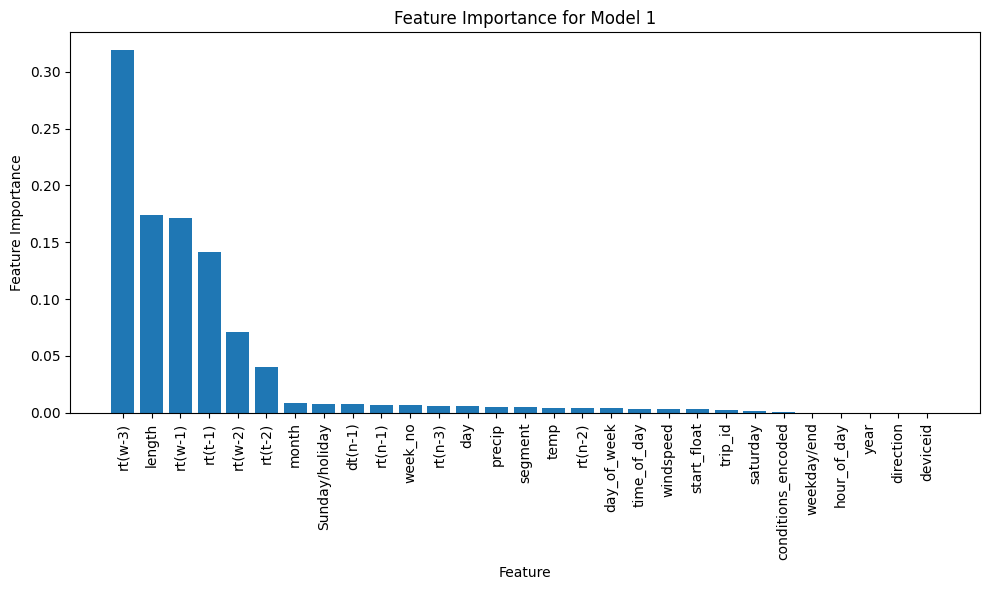

In [30]:
import matplotlib.pyplot as plt

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


# XG boost with clusters

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models = {}

# Loop for Code Block 2
for df_tup in pivot_dfs:
    daf_with_clus = df[df['direction'] == 1].copy()
    pivot_df = df_tup[0]
    cluster_method = df_tup[1]
    
    # Merge the dataframes using the device_id column
    new_df = pd.merge(daf_with_clus, pivot_df, on='deviceid', how='inner')
    new_df = new_df[new_df['direction'] == 1]
    
    # Define features and target for Code Block 2
    features2 = new_df.drop(['run_time_in_seconds'], axis=1)
    target2 = new_df['run_time_in_seconds']
    
    model2,predictions2,predicted_df2,mae2,rmse2,mape2 = train_Model(new_df)
    
    models[cluster_method] = model2
    
    mae_rmse_dict[f"{cluster_method} with clusters"] = [mae2, rmse2,mape2]
    
    print(f'Mean Absolute Error {cluster_method} : {mae2}')
    print(f'Root Mean Square Error {cluster_method} : {rmse2}')
    print(f'Mean Absolute Percentage Error {cluster_method} : {mape2}')
    print(" ")
    
mae_rmse_dict["skip 2"] = " "


Mean Absolute Error NormCluster : 32.55916648398746
Root Mean Square Error NormCluster : 52.9324391805967
Mean Absolute Percentage Error NormCluster : 19.388195760620597
 
Mean Absolute Error TSclusters km pca : 32.788062356276946
Root Mean Square Error TSclusters km pca : 53.02307602052399
Mean Absolute Percentage Error TSclusters km pca : 19.70150720388855
 
Mean Absolute Error TSclusters withdtw : 33.14999006661502
Root Mean Square Error TSclusters withdtw : 53.830964830868886
Mean Absolute Percentage Error TSclusters withdtw : 19.835052874330092
 
Mean Absolute Error TSclusters no dtw : 33.41819931973111
Root Mean Square Error TSclusters no dtw : 54.847581014302435
Mean Absolute Percentage Error TSclusters no dtw : 20.216386250304488
 
Mean Absolute Error TScluster_SDTW : 33.51494017839432
Root Mean Square Error TScluster_SDTW : 55.15118498513271
Mean Absolute Percentage Error TScluster_SDTW : 20.517664692000555
 
Mean Absolute Error NormCluster_new : 33.02250117497011
Root Mean Sq

In [32]:
#without clusters :
# Mean Absolute Error (Code Block 1): 32.854974080215804
# Root Mean Square Error (Code Block 1): 53.20377299850515

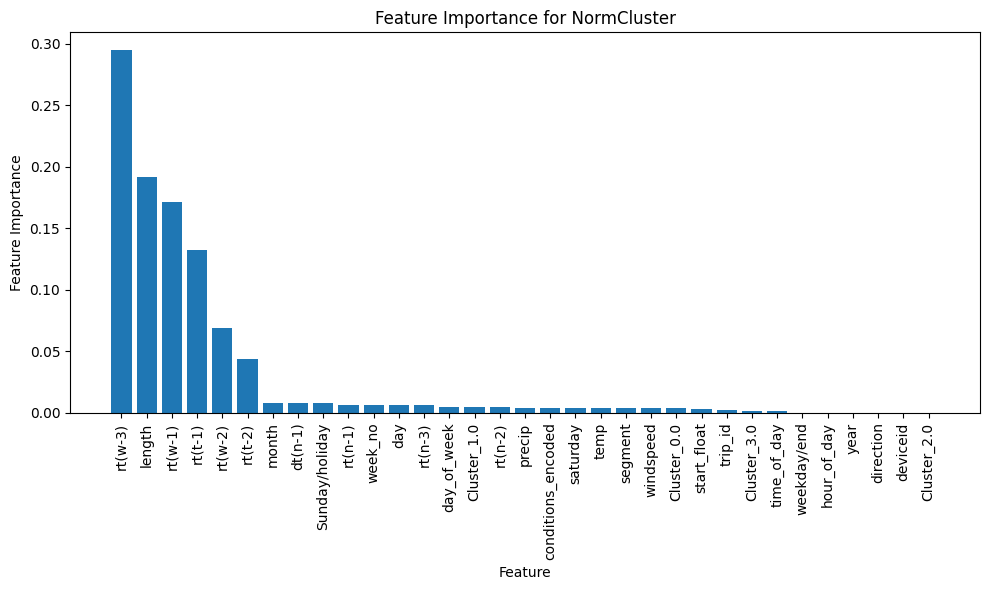

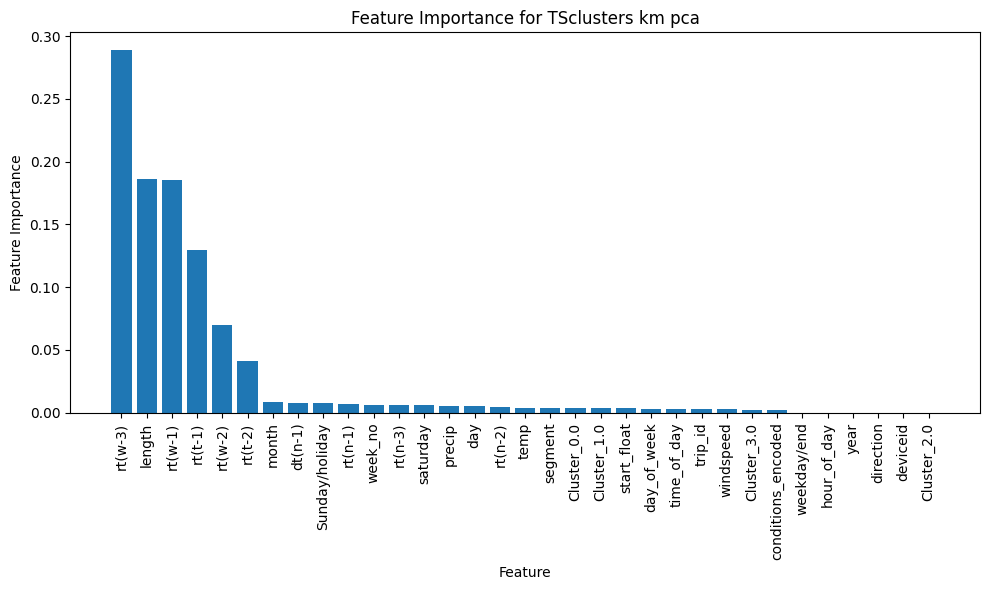

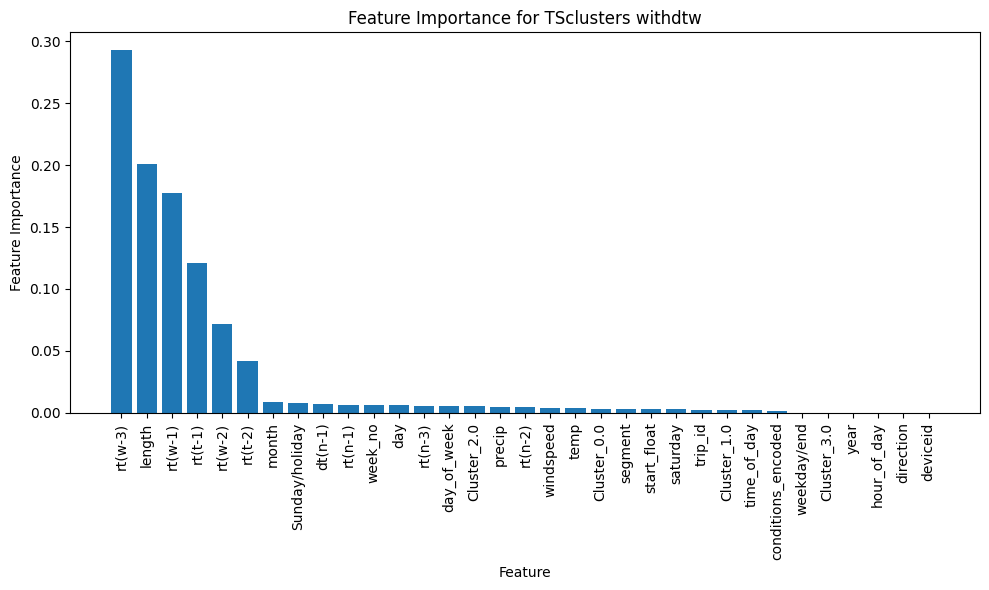

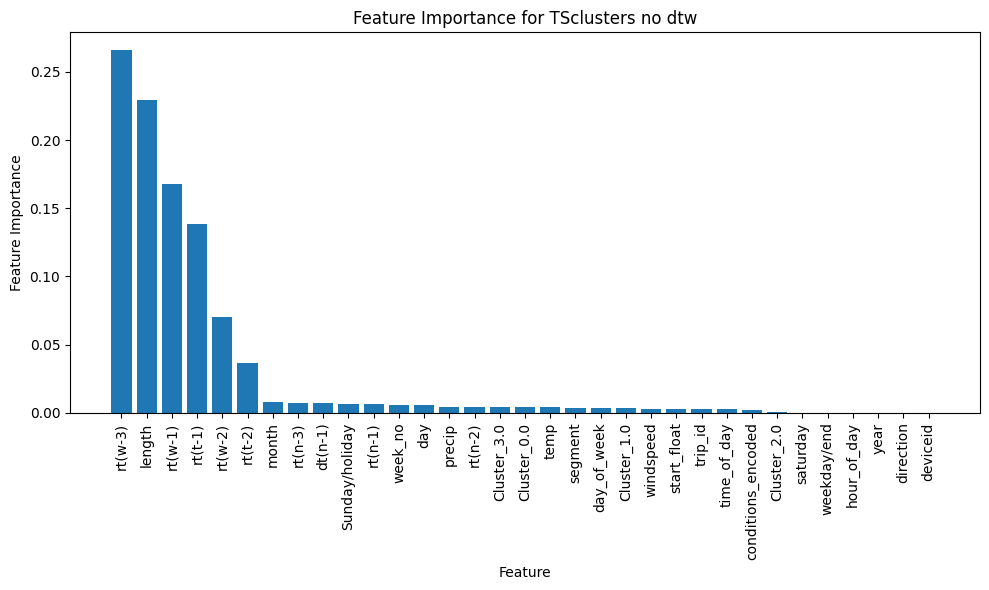

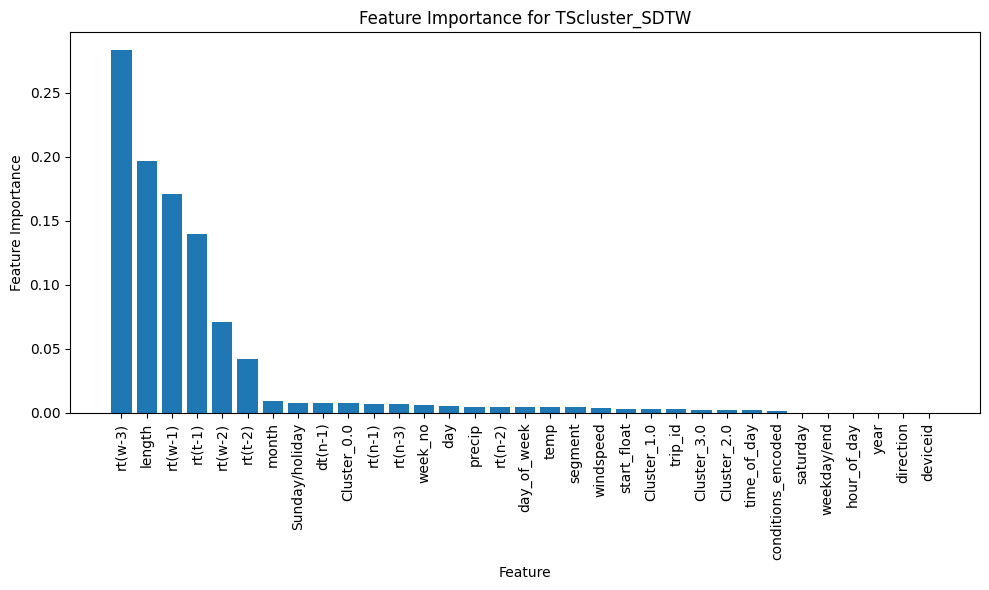

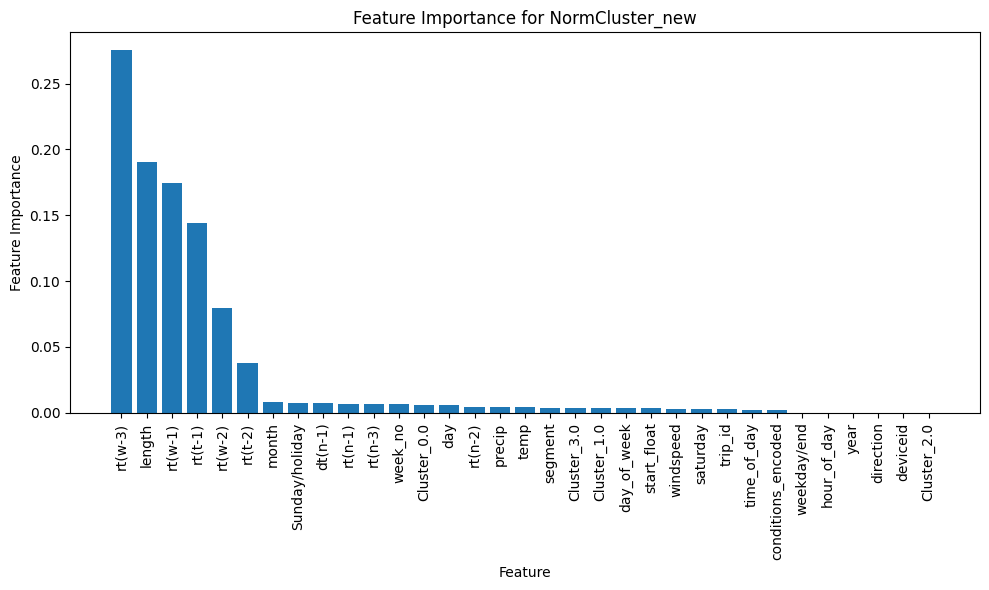

In [33]:
import matplotlib.pyplot as plt

for modelname, model in models.items():
    # Get feature importances for Model 2
    feature_importance2 = model.feature_importances_

    # Get the names of the features
    feature_names2 = features2.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {modelname}')
    plt.tight_layout()
    plt.show()


In [34]:
predicted_df2.to_csv('../DataOut/runtime_with_clusters_predictions.csv', index=False)

# XG boost with new features

In [35]:
daf_with_features = df[df['direction'] == 1].copy()

In [36]:
# load csv '../DataOut/means_and_maxima_minima_counts.csv'
means_and_maxima_minima_counts = pd.read_csv('../DataOut/means_and_maxima_minima_counts.csv')

In [37]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0.0,116.0,6.414320,-0.073623,0.345581,116,15,13
1,2.0,1.0,116.0,8.909300,-0.089993,0.512175,116,0,1
2,2.0,2.0,116.0,8.140889,0.011076,0.469639,116,0,0
3,2.0,3.0,116.0,8.574518,-0.007302,0.435498,116,6,5
4,2.0,4.0,116.0,12.303306,-0.105420,0.376268,116,2,4
...,...,...,...,...,...,...,...,...,...
37594,5587.0,2.0,262.0,3.023758,0.166394,0.078641,262,2,1
37595,5587.0,3.0,262.0,2.221536,-0.021232,0.326771,262,10,10
37596,5587.0,4.0,262.0,2.429807,0.223977,0.200655,262,4,4
37597,5587.0,5.0,262.0,2.699783,0.393279,0.063192,262,4,3


In [38]:
# get the number of unique trip ids
unique_trip_ids = means_and_maxima_minima_counts['trip_id'].unique()
len(unique_trip_ids)

2552

In [39]:
# drop deviceid_x and deviceid_y columns from means_and_maxima_minima_counts
means_and_maxima_minima_counts.drop(['deviceid_x', 'deviceid_y'], axis=1, inplace=True)

In [40]:
# open csv avg_for_devID_time_of_day_and_segment.csv
avg_for_devID_time_of_day_and_segment = pd.read_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv')

In [41]:
# rename avg_for_devID_time_of_day_and_segment time_of_day column to dayparts
avg_for_devID_time_of_day_and_segment.rename(columns={'time_of_day': 'dayparts'}, inplace=True)

In [42]:
avg_for_devID_time_of_day_and_segment

,deviceid,dayparts,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0.0,8.505397,-0.140236,0.432507,13.977379,11.106361
1,116.0,morning,1.0,7.000882,0.037695,0.302234,1.041507,0.880564
2,116.0,morning,2.0,8.479835,0.012879,0.490989,2.744903,1.316206
3,116.0,morning,3.0,9.385685,-0.003781,0.579622,6.464635,5.526108
4,116.0,morning,4.0,13.542030,-0.046590,0.403892,3.233826,3.485854
...,...,...,...,...,...,...,...,...
355,262.0,night,10.0,13.120965,-0.199784,0.691697,2.000000,2.000000
356,262.0,night,11.0,15.778753,0.106236,1.316241,2.000000,3.000000
357,262.0,night,12.0,18.589964,-0.142586,1.190427,1.000000,2.000000
358,262.0,night,13.0,17.926560,0.093593,0.773676,0.000000,1.000000


In [43]:
import pandas as pd

# Assuming 'hour_of_day' column is a string in the format 'YYYY-MM-DD HH:mm:ss'
# If it's not, adjust the format accordingly


# Create a new 'time_of_day' column based on the time component
daf_with_features['dayparts'] = pd.cut(
    daf_with_features['hour_of_day'],
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# Now, 'time_of_day' will be 'morning' for times before 6:00 AM,
# 'day' for times between 6:00 AM and 7:00 PM, and 'night' for times after 7:00 PM


In [44]:
# add data from avg_for_devID_time_of_day_and_segment to daf_with_features based on deviceid and dayparts
daf_with_features = pd.merge(daf_with_features, avg_for_devID_time_of_day_and_segment, on=['deviceid', 'dayparts','segment'], how='left')

In [45]:
# # # left join daf_with_features with means_and_maxima_minima_counts on trip_id and segment
# daf_with_features_unPerTripid = pd.merge(daf_with_features, means_and_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [46]:
# daf_with_features_unPerTripid

In [47]:
# # get the number of unique trip ids
# unique_trip_ids = daf_with_features_unPerTripid['trip_id'].unique()
# len(unique_trip_ids)

In [48]:
# # count the num of Nan in each column
# daf_with_features_unPerTripid.isnull().sum()

In [49]:
# # save csv
# daf_with_features_unPerTripid.to_csv(f'../DataOut/fullDataset_with_Newfeatures.csv', index=False)

In [50]:
daf_with_features.head(20)

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,start_float,conditions_encoded,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,6.663611,4.0,morning,6.916593,-0.074737,0.160659,1.000000,0.666667
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,6.703333,4.0,morning,11.357502,0.022089,0.668926,2.333333,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,6.761667,4.0,morning,8.529526,-0.235771,0.628842,7.666667,8.333333
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,6.901111,4.0,morning,11.565562,-0.131208,0.334048,1.666667,3.666667
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,6.955278,4.0,morning,15.991726,0.135593,0.433563,1.333333,1.000000
5,4890.0,262.0,1.0,6.0,210.0,1.3125,4.0,7.00,0.0,0,1,1.0,220.0,220.0,220.0,220.0,220.0,97.0,195.0,496.0,7.0,1,10,20.7,0.0,6.8,211.0,2021,7.040833,4.0,day,10.166571,-0.156590,0.753466,3.211480,3.806647
6,4890.0,262.0,1.0,7.0,45.0,0.3713,4.0,7.00,0.0,0,1,1.0,39.0,39.0,39.0,39.0,39.0,210.0,97.0,195.0,7.0,1,10,20.7,0.0,6.8,35.0,2021,7.108889,4.0,day,14.054857,0.204122,0.534344,0.079268,0.073171
7,4890.0,262.0,1.0,8.0,99.0,0.6245,4.0,7.00,0.0,0,1,1.0,74.0,74.0,74.0,74.0,74.0,45.0,210.0,97.0,7.0,1,10,20.7,0.0,6.8,25.0,2021,7.128333,4.0,day,12.965748,-0.153365,0.988430,0.663636,0.836364
8,4890.0,262.0,1.0,9.0,34.0,0.2572,4.0,7.00,0.0,0,1,1.0,26.0,26.0,26.0,26.0,26.0,99.0,45.0,210.0,7.0,1,10,20.7,0.0,6.8,23.0,2021,7.162222,4.0,day,12.885219,-0.140137,0.390422,2.136364,2.593939
9,4890.0,262.0,1.0,10.0,149.0,1.2349,4.0,7.00,0.0,0,1,1.0,157.0,157.0,157.0,157.0,157.0,34.0,99.0,45.0,7.0,1,10,20.7,0.0,6.8,44.0,2021,7.183889,4.0,day,11.625918,-0.202859,0.522543,2.272727,2.133333


In [51]:
# Create a custom mapping dictionary
dayparts_mapping = {'morning': 0, 'day': 1, 'night': 2}

# Use the map function to label encode 'dayparts' column
daf_with_features['dayparts'] = daf_with_features['dayparts'].map(dayparts_mapping)


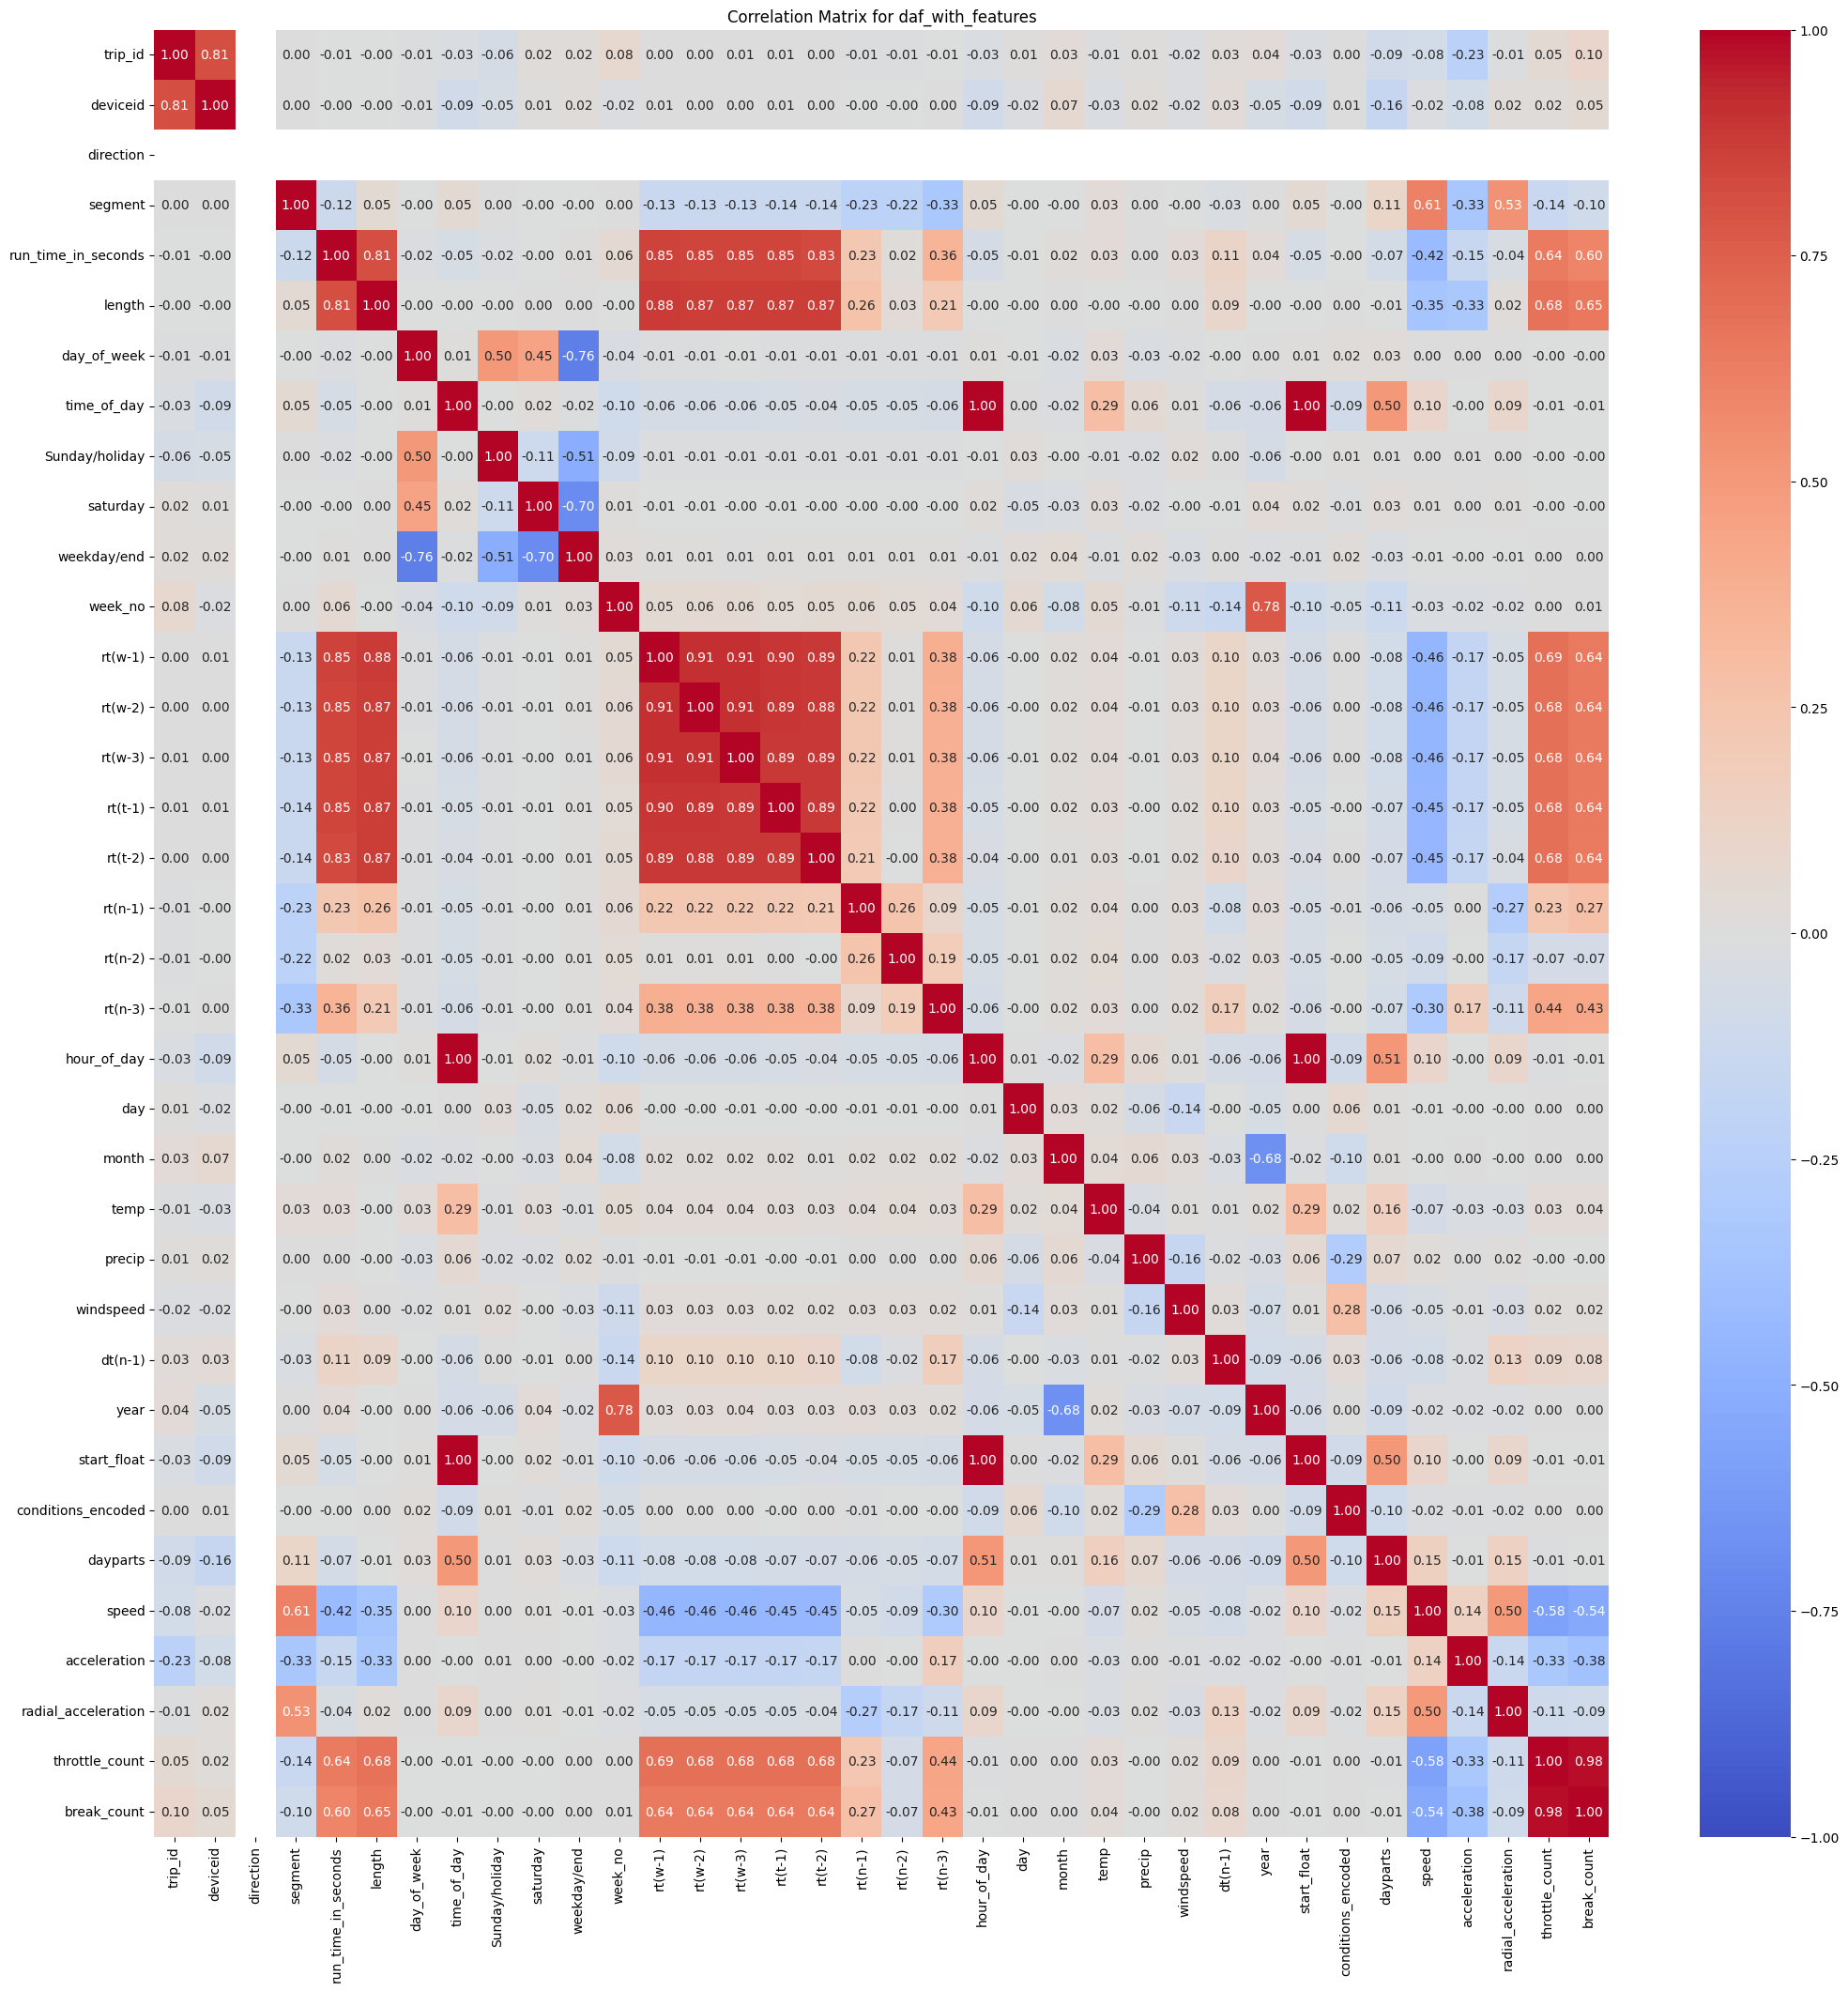

In [52]:
# visulaize a corelation matrix for daf_with_features dataframe
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = daf_with_features.corr()

# Create a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for daf_with_features')
plt.show()


In [53]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,start_float,conditions_encoded,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.663611,4.0,0,6.916593,-0.074737,0.160659,1.000000,0.666667
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,6.703333,4.0,0,11.357502,0.022089,0.668926,2.333333,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.761667,4.0,0,8.529526,-0.235771,0.628842,7.666667,8.333333
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,6.901111,4.0,0,11.565562,-0.131208,0.334048,1.666667,3.666667
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.955278,4.0,0,15.991726,0.135593,0.433563,1.333333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,3461.0,123.0,1.0,11.0,183.0,1.1000,0.0,17.50,0.0,0,1,42.0,172.0,166.0,156.0,242.0,116.0,194.0,39.0,94.0,17.0,31,10,25.3,0.269,0.1,0.0,2022,17.676667,1.0,1,12.005015,-0.189625,0.751617,2.814536,3.117794
40743,3461.0,123.0,1.0,12.0,173.0,1.3100,0.0,17.50,0.0,0,1,42.0,183.0,170.0,172.0,142.0,150.0,183.0,194.0,39.0,17.0,31,10,25.3,0.269,0.1,10.0,2022,17.730278,1.0,1,12.614766,-0.414630,0.694819,2.173804,2.438287
40744,3461.0,123.0,1.0,13.0,142.0,1.1500,0.0,17.75,0.0,0,1,42.0,149.0,149.0,161.0,149.0,134.0,173.0,183.0,194.0,17.0,31,10,25.3,0.269,0.1,2.0,2022,17.778889,1.0,1,14.267742,-0.033340,0.561315,1.142494,1.554707
40745,3461.0,123.0,1.0,14.0,121.0,0.8900,0.0,17.75,0.0,0,1,42.0,119.0,119.0,151.0,335.0,119.0,142.0,173.0,183.0,17.0,31,10,25.3,0.269,0.1,17.0,2022,17.823056,1.0,1,9.121827,-0.268769,0.638583,6.541985,7.086514


In [54]:
# drop highly correlated columns
# daf_with_features.drop(['hour_of_day', 'break_count', 'dayparts'], axis=1, inplace=True)

In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 3
features3 = daf_with_features.drop(['run_time_in_seconds'], axis=1)
target3 = daf_with_features['run_time_in_seconds']

model3,predictions3,predicted_df3,mae3,rmse3,mape3 = train_Model(daf_with_features)

mae_rmse_dict["with new features"] = [mae3, rmse3,mape3]
mae_rmse_dict["skip 3"] = " "

print(f'Mean Absolute Error (Code Block 3): {mae3}')
print(f'Root Mean Square Error (Code Block 3): {rmse3}')
print(f'Mean Absolute Percentage Error (Code Block 3): {mape3}')


Mean Absolute Error (Code Block 3): 32.98651195547797
Root Mean Square Error (Code Block 3): 53.68509382081787
Mean Absolute Percentage Error (Code Block 3): 19.838379665078364


In [56]:
# without new features

# Mean Absolute Error (Code Block 1): 32.854974080215804
# Root Mean Square Error (Code Block 1): 53.20377299850515

# with clusters

# Mean Absolute Error TSclusters km pca : 32.749991629882295
# Root Mean Square Error TSclusters km pca : 53.16101130982849

# with new features 

# Mean Absolute Error (Code Block 3): 30.52582188898867
# Root Mean Square Error (Code Block 3): 50.935979446776805

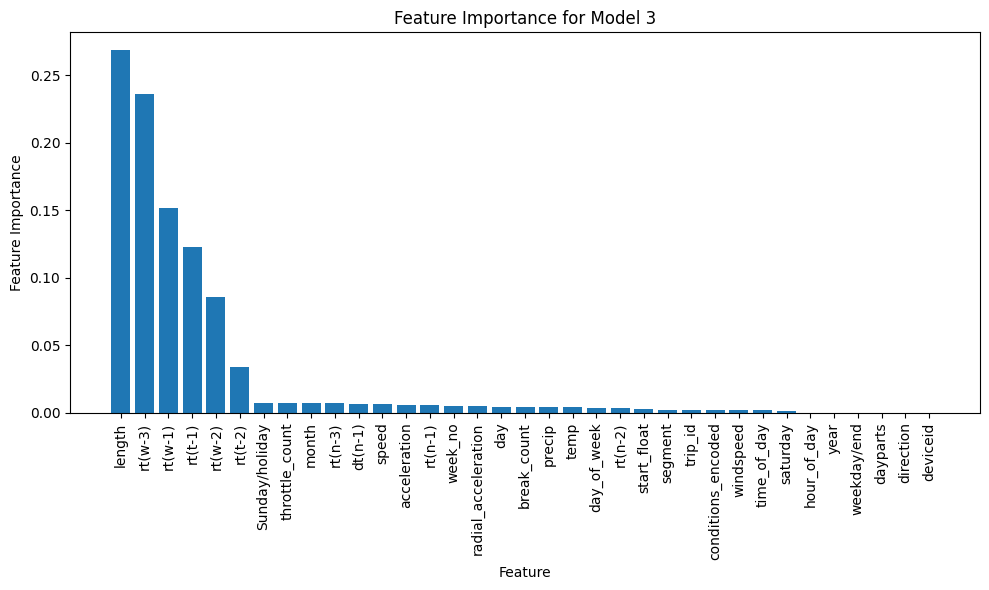

In [57]:
import matplotlib.pyplot as plt

# Get feature importances for Model 3
feature_importance3 = model3.feature_importances_

# Get the names of the features
feature_names3 = features3.columns

# Sort feature importances and feature names in descending order
sorted_idx3 = feature_importance3.argsort()[::-1]
feature_importance3 = feature_importance3[sorted_idx3]
feature_names3 = feature_names3[sorted_idx3]

# Create a bar graph for Model 3
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance3)), feature_importance3, align='center')
plt.xticks(range(len(feature_importance3)), feature_names3, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 3')
plt.tight_layout()
plt.show()


In [58]:
predicted_df3.to_csv('../DataOut/runtime_with_predictions.csv', index=False)

# XG boost with new features + Clusters

In [59]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,start_float,conditions_encoded,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.663611,4.0,0,6.916593,-0.074737,0.160659,1.000000,0.666667
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,6.703333,4.0,0,11.357502,0.022089,0.668926,2.333333,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.761667,4.0,0,8.529526,-0.235771,0.628842,7.666667,8.333333
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,6.901111,4.0,0,11.565562,-0.131208,0.334048,1.666667,3.666667
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.955278,4.0,0,15.991726,0.135593,0.433563,1.333333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,3461.0,123.0,1.0,11.0,183.0,1.1000,0.0,17.50,0.0,0,1,42.0,172.0,166.0,156.0,242.0,116.0,194.0,39.0,94.0,17.0,31,10,25.3,0.269,0.1,0.0,2022,17.676667,1.0,1,12.005015,-0.189625,0.751617,2.814536,3.117794
40743,3461.0,123.0,1.0,12.0,173.0,1.3100,0.0,17.50,0.0,0,1,42.0,183.0,170.0,172.0,142.0,150.0,183.0,194.0,39.0,17.0,31,10,25.3,0.269,0.1,10.0,2022,17.730278,1.0,1,12.614766,-0.414630,0.694819,2.173804,2.438287
40744,3461.0,123.0,1.0,13.0,142.0,1.1500,0.0,17.75,0.0,0,1,42.0,149.0,149.0,161.0,149.0,134.0,173.0,183.0,194.0,17.0,31,10,25.3,0.269,0.1,2.0,2022,17.778889,1.0,1,14.267742,-0.033340,0.561315,1.142494,1.554707
40745,3461.0,123.0,1.0,14.0,121.0,0.8900,0.0,17.75,0.0,0,1,42.0,119.0,119.0,151.0,335.0,119.0,142.0,173.0,183.0,17.0,31,10,25.3,0.269,0.1,17.0,2022,17.823056,1.0,1,9.121827,-0.268769,0.638583,6.541985,7.086514


In [60]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models2 = {}

# Loop for Code Block 4
for df_tup in pivot_dfs:
    new_df_block4= pd.DataFrame()
    daf_with_clus_block4 = daf_with_features.copy()
    pivot_df_block4 = df_tup[0]
    cluster_method_block4 = df_tup[1]
    
    # Merge the dataframes using the device_id column for Code Block 4
    new_df_block4 = pd.merge(daf_with_clus_block4, pivot_df_block4, on='deviceid', how='inner')
    new_df_block4 = new_df_block4[new_df_block4['direction'] == 1]
    
    # Define features and target for Code Block 4
    features_block4 = new_df_block4.drop(['run_time_in_seconds'], axis=1)
    target_block4 = new_df_block4['run_time_in_seconds']
    
    model_block4,predictions_block4,predicted_df_block4,mae_block4,rmse_block4 ,mape4= train_Model(new_df_block4)
    
    models2[cluster_method_block4] = model_block4
    
    mae_rmse_dict[f"new features & {cluster_method_block4}"] = [mae_block4, rmse_block4,mape4]
    
    print(f'Mean Absolute Error {cluster_method_block4} : {mae_block4}')
    print(f'Root Mean Square Error {cluster_method_block4} : {rmse_block4}')
    print(f'Mean Absolute Percentage Error {cluster_method_block4} : {mape4}')
mae_rmse_dict["skip 4"] = " "


Mean Absolute Error NormCluster : 32.9333653753454
Root Mean Square Error NormCluster : 53.42721215762026
Mean Absolute Percentage Error NormCluster : 19.68858899168292
Mean Absolute Error TSclusters km pca : 33.26482565999031
Root Mean Square Error TSclusters km pca : 54.28399227401575
Mean Absolute Percentage Error TSclusters km pca : 20.186192671065903
Mean Absolute Error TSclusters withdtw : 32.60104445598342
Root Mean Square Error TSclusters withdtw : 52.82143040789428
Mean Absolute Percentage Error TSclusters withdtw : 19.30113069991754
Mean Absolute Error TSclusters no dtw : 32.397985370050776
Root Mean Square Error TSclusters no dtw : 52.52058223331245
Mean Absolute Percentage Error TSclusters no dtw : 19.085250379001724
Mean Absolute Error TScluster_SDTW : 32.52539296746254
Root Mean Square Error TScluster_SDTW : 52.687585722368176
Mean Absolute Percentage Error TScluster_SDTW : 19.068959370315206
Mean Absolute Error NormCluster_new : 32.76811622056094
Root Mean Square Error N

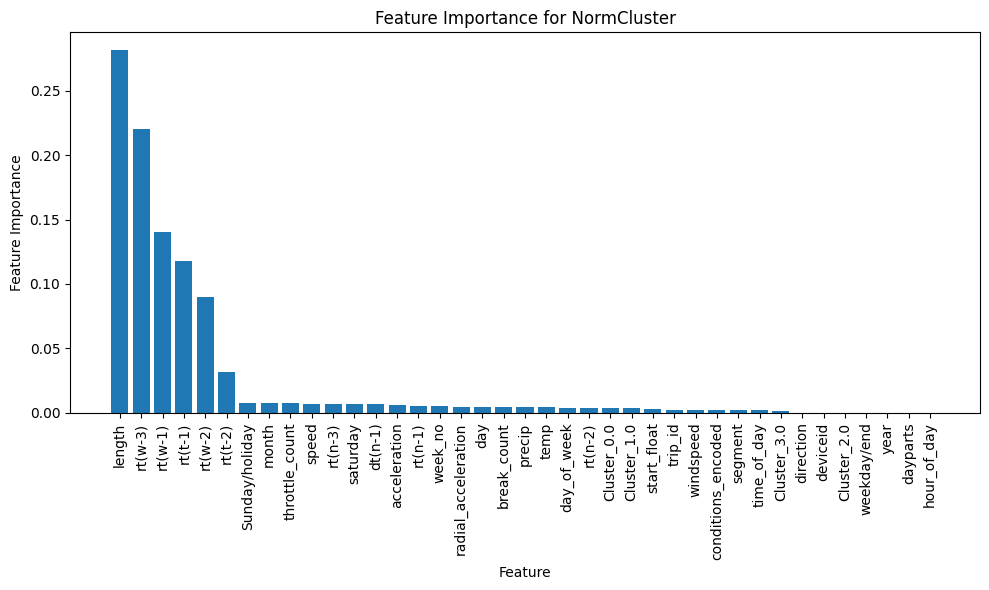

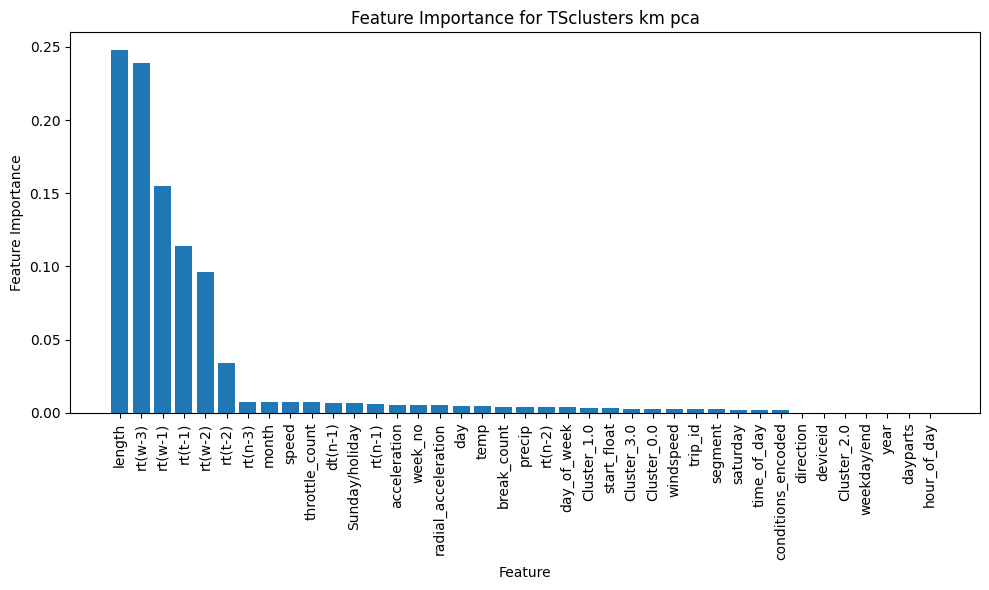

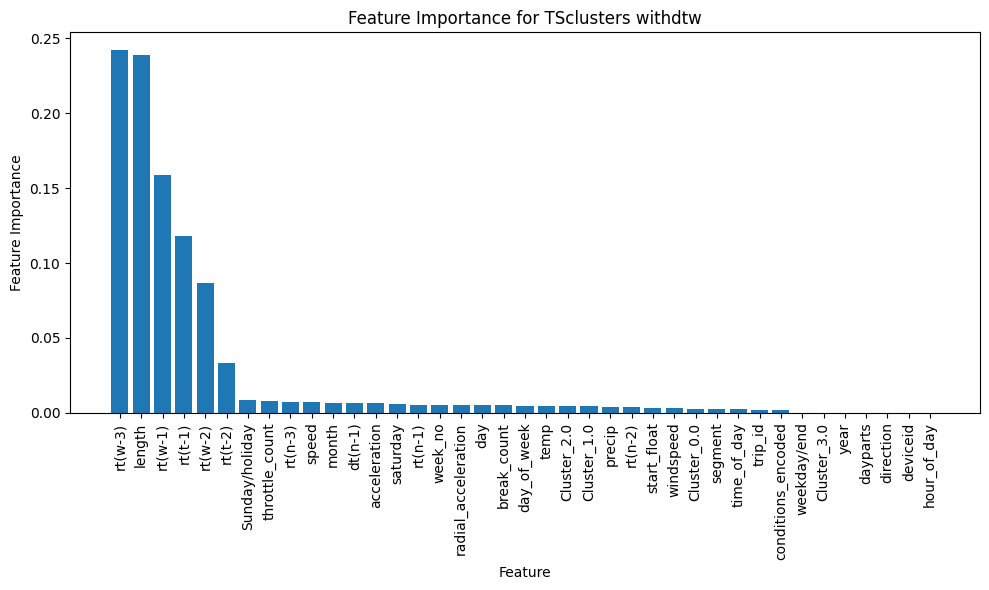

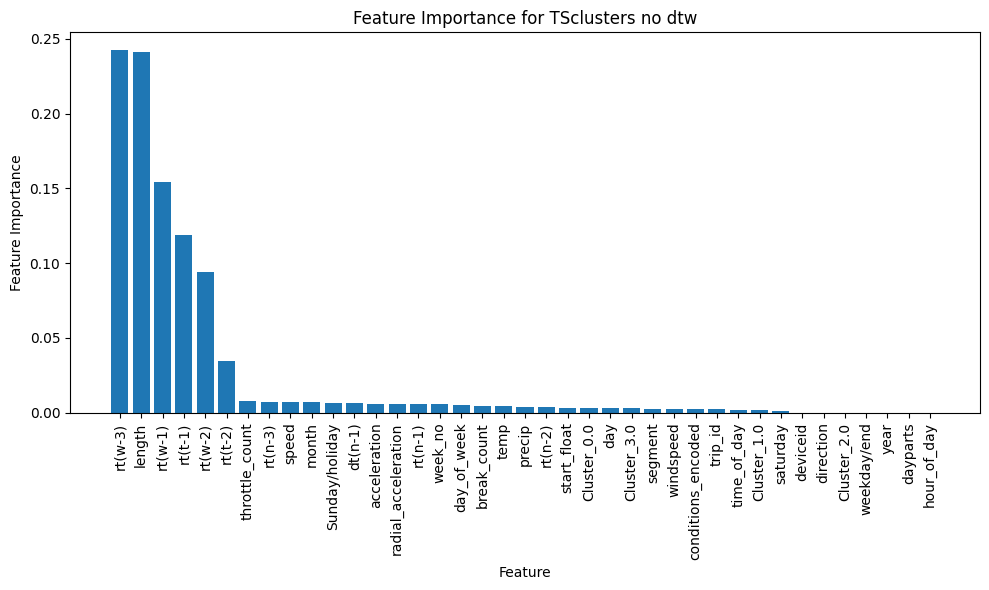

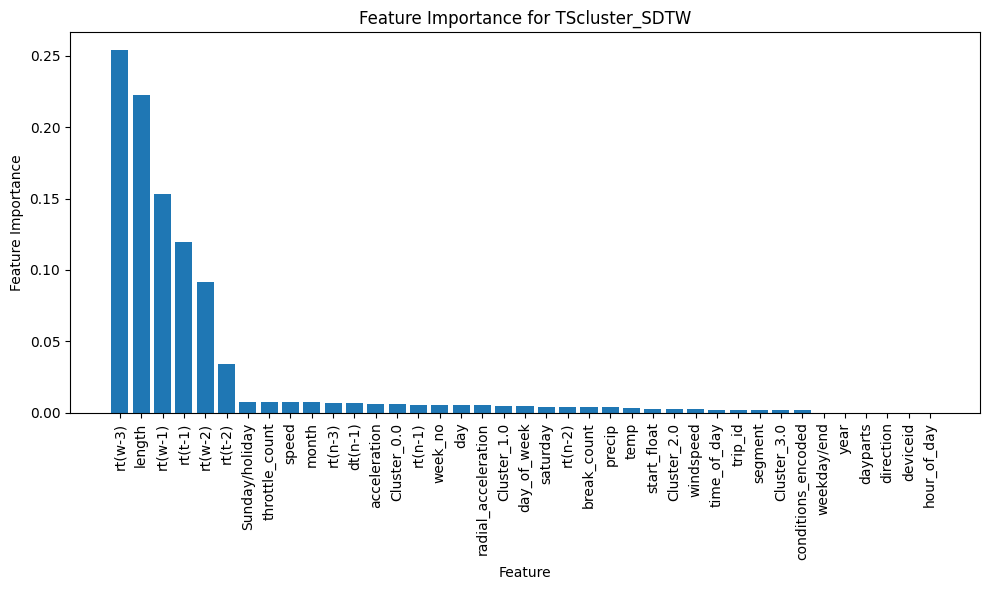

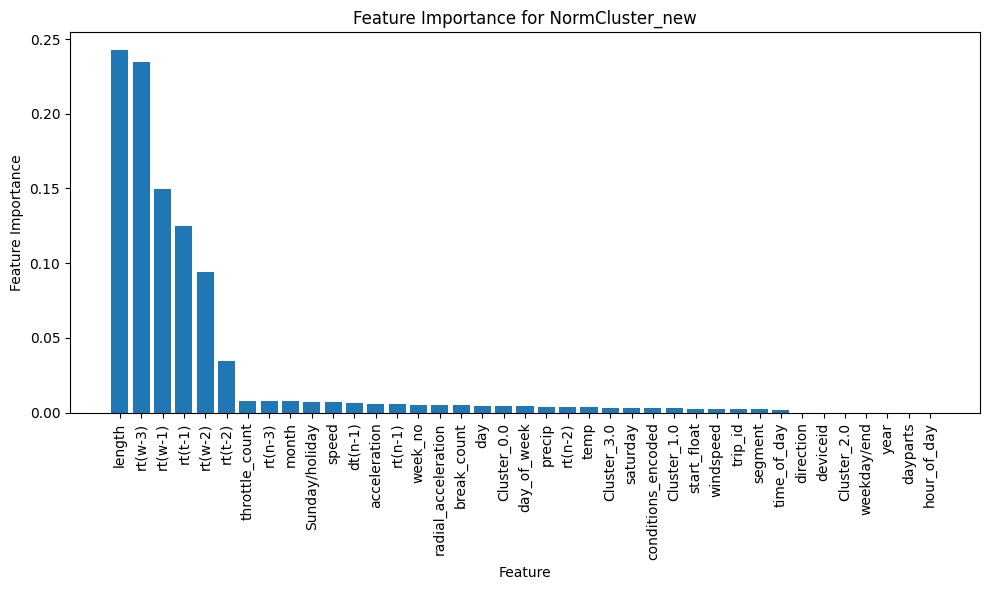

In [61]:
import matplotlib.pyplot as plt

for modelname, model in models2.items():
    # Get feature importances for Model 2
    feature_importance2 = model.feature_importances_

    # Get the names of the features
    feature_names2 = features_block4.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {modelname}')
    plt.tight_layout()
    plt.show()


# XG boost with new features + Clusters - PCAd

In [62]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,start_float,conditions_encoded,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.663611,4.0,0,6.916593,-0.074737,0.160659,1.000000,0.666667
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,6.703333,4.0,0,11.357502,0.022089,0.668926,2.333333,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.761667,4.0,0,8.529526,-0.235771,0.628842,7.666667,8.333333
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,6.901111,4.0,0,11.565562,-0.131208,0.334048,1.666667,3.666667
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.955278,4.0,0,15.991726,0.135593,0.433563,1.333333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,3461.0,123.0,1.0,11.0,183.0,1.1000,0.0,17.50,0.0,0,1,42.0,172.0,166.0,156.0,242.0,116.0,194.0,39.0,94.0,17.0,31,10,25.3,0.269,0.1,0.0,2022,17.676667,1.0,1,12.005015,-0.189625,0.751617,2.814536,3.117794
40743,3461.0,123.0,1.0,12.0,173.0,1.3100,0.0,17.50,0.0,0,1,42.0,183.0,170.0,172.0,142.0,150.0,183.0,194.0,39.0,17.0,31,10,25.3,0.269,0.1,10.0,2022,17.730278,1.0,1,12.614766,-0.414630,0.694819,2.173804,2.438287
40744,3461.0,123.0,1.0,13.0,142.0,1.1500,0.0,17.75,0.0,0,1,42.0,149.0,149.0,161.0,149.0,134.0,173.0,183.0,194.0,17.0,31,10,25.3,0.269,0.1,2.0,2022,17.778889,1.0,1,14.267742,-0.033340,0.561315,1.142494,1.554707
40745,3461.0,123.0,1.0,14.0,121.0,0.8900,0.0,17.75,0.0,0,1,42.0,119.0,119.0,151.0,335.0,119.0,142.0,173.0,183.0,17.0,31,10,25.3,0.269,0.1,17.0,2022,17.823056,1.0,1,9.121827,-0.268769,0.638583,6.541985,7.086514


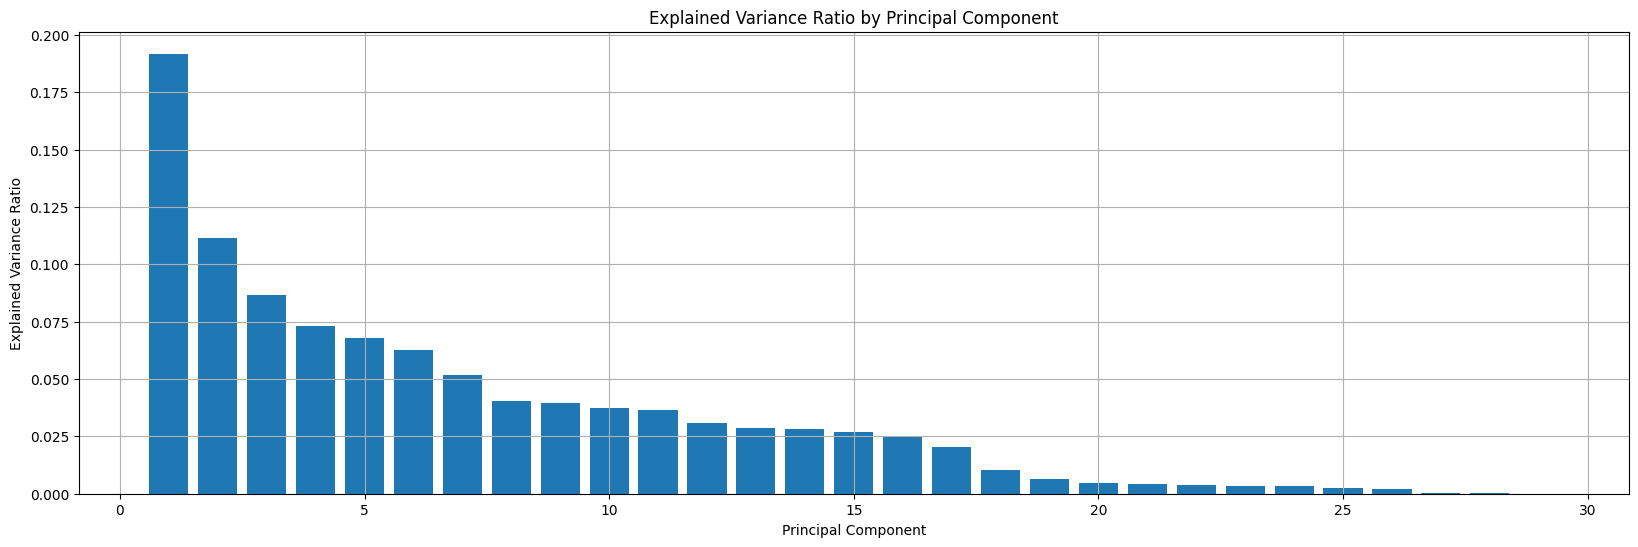

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' with the features
# Select the features for PCA (exclude non-numeric and target columns)
features = df.drop(['run_time_in_seconds'], axis=1)

# Standardize the features (important for PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
n_components = min(features_scaled.shape[0], features_scaled.shape[1])
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA components and 'run_time_in_seconds'
pca_df = pd.DataFrame(principal_components, columns=[f'PCA_{i+1}' for i in range(n_components)])

# Ensure the index of pca_df matches the index of df
pca_df.index = df.index

# Add 'run_time_in_seconds' to pca_df
pca_df['run_time_in_seconds'] = df['run_time_in_seconds']

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(20, 6))
plt.bar(range(1, n_components + 1, 1), explained_variance_ratio, alpha=1, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()


In [64]:
pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,run_time_in_seconds
0,-2.218366,-2.747481,-0.399474,2.702365,-2.033853,1.527198,0.123770,-0.214029,1.008145,0.307742,-1.199130,0.266865,-0.096697,-0.112190,-1.257113,0.746351,0.704307,-0.869952,-0.149555,0.011880,-0.002253,0.428938,0.000296,0.070441,0.068009,-0.393510,0.135522,-0.029976,-0.006291,69.0
1,1.091431,-2.618590,-0.367748,2.890821,-2.055214,1.532089,-0.019979,-0.090972,1.095484,1.236126,0.327924,0.012436,-0.510441,-0.319361,-1.147615,0.373236,0.937868,-0.867600,-0.156244,0.027349,0.000033,0.281954,-0.000234,0.048179,0.064694,-0.190724,0.132849,-0.034488,-0.013569,210.0
2,6.444124,-2.359505,-0.341898,2.837576,-2.246703,1.456662,0.183212,0.209191,0.877228,0.655497,-0.859773,0.000425,0.577723,1.588073,-1.615423,0.707331,0.810252,-0.866589,-0.140466,0.018091,0.012204,0.672249,0.010867,0.096483,0.062924,0.149652,0.116075,-0.063882,0.023606,496.0
3,0.372899,-2.676841,-0.385892,2.513572,-1.213805,1.639416,0.179006,1.087178,0.602148,0.559167,-1.680348,2.279048,1.049186,-1.023695,-0.938404,0.166309,0.992287,-0.868084,-0.127646,0.051983,-0.038549,-0.443876,-0.006906,-0.069367,0.057272,-0.221825,0.126840,-0.079939,-0.002872,195.0
4,-1.406610,-2.744857,-0.405260,2.424464,-1.262341,1.651956,0.139351,1.856319,0.386679,1.495357,-0.281839,0.970058,-1.539489,-0.662722,-1.442346,0.581071,0.896319,-0.869992,-0.122945,0.038522,-0.008797,-0.156359,-0.010711,-0.018785,0.056175,-0.029341,0.118200,-0.087994,-0.012364,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,-1.503084,2.077037,-1.611907,-1.804456,1.145736,0.077558,0.086253,-0.903302,-1.104087,-1.509543,0.269775,-0.752429,-1.121364,1.026804,0.688921,-1.170000,1.131394,0.792632,0.399814,-0.040014,0.029884,0.033139,0.008142,-0.005221,-0.149465,-0.159398,-0.033966,-0.069032,0.023467,99.0
150702,0.520379,2.176605,-1.588083,-1.702738,1.073158,0.054407,0.087577,-1.558778,-0.899989,-1.899314,-0.123247,-0.608479,-0.608481,0.846492,0.835428,-1.236777,1.135832,0.793794,0.393641,-0.038513,0.024499,-0.013301,0.011291,-0.016149,-0.150029,-0.136983,-0.030618,-0.071986,0.017415,165.0
150703,4.317970,2.338353,-1.547239,-1.577665,1.104901,0.040084,0.077176,-2.044606,-0.732543,-2.118651,-0.388359,-0.027453,-0.654345,-0.217380,1.103380,-1.431014,1.216616,0.795432,0.394979,-0.027017,0.005207,-0.495411,0.011193,-0.089228,-0.153239,-0.210157,-0.025476,-0.077783,0.006895,337.0
150704,-2.724036,1.973382,-1.627621,-2.002002,1.841799,0.195133,0.100447,-0.106775,-1.349554,-1.450017,-0.152767,0.582918,0.075810,0.419954,1.000409,-1.574504,1.285669,0.791125,0.394073,-0.013907,0.036519,0.335230,0.011153,0.022077,-0.152247,0.250534,-0.043834,-0.087725,-0.011404,46.0


In [65]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Models dictionary
# models = {}

# # Loop for Code Block 5
# for df_tup in pivot_dfs:
#     pca_df_copy = pca_df.copy()
#     pivot_df = df_tup[0]
#     cluster_method = df_tup[1]
    
#     # Define features and target
#     features = pca_df_copy.drop(['run_time_in_seconds'], axis=1)
#     target = pca_df_copy['run_time_in_seconds']
    
#     model, predictions, predicted_df, mae, rmse, mape = train_Model(pca_df_copy)
    
#     models[cluster_method] = model
    
#     mae_rmse_dict[f'new_features_{cluster_method}_PCA'] = [mae, rmse, mape]
    
#     print(f'Mean Absolute Error {cluster_method}: {mae}')
#     print(f'Root Mean Square Error {cluster_method}: {rmse}')
#     print(f'Mean Absolute Percentage Error {cluster_method}: {mape}')
    
# mae_rmse_dict['skip_5'] = " "


In [66]:
# import matplotlib.pyplot as plt

# for model in models2:

#     # Get feature importances for Model 2
#     feature_importance2 = model2.feature_importances_

#     # Get the names of the features
#     feature_names2 = features2.columns

#     # Sort feature importances and feature names in descending order
#     sorted_idx2 = feature_importance2.argsort()[::-1]
#     feature_importance2 = feature_importance2[sorted_idx2]
#     feature_names2 = feature_names2[sorted_idx2]

#     # Create a bar graph for Model 2
#     plt.figure(figsize=(10, 6))
#     plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
#     plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
#     plt.xlabel('Feature')
#     plt.ylabel('Feature Importance')
#     plt.title(f'Feature Importance for {model}')
#     plt.tight_layout()
#     plt.show()


# Summery

In [67]:
# print mae and rmse for all models and get the best model
best_model = None
best_mae = None
best_rmse = None
for key, value in mae_rmse_dict.items():
    if key == "skip 1" or key == "skip 2" or key == "skip 3" or key == "skip 4" or key == "skip_5": 
        print(" ")
    else:
        print(f"{key} : MAE: {value[0]}, RMSE: {value[1]} , MAPE: {value[2]}")
        if best_model == None:
            best_model = key
            best_mae = value[0]
            best_rmse = value[1]
            best_mape = value[2]
        else:
            if value[0] < best_mae:
                best_model = key
                best_mae = value[0]
                best_rmse = value[1]
                best_mape = value[2]
                
print(" ")
print(f"Best model : {best_model} , MAE: {best_mae}, RMSE: {best_rmse} , MAPE: {best_mape}")
    
    

without clusters : MAE: 32.854974080215804, RMSE: 53.20377299850515 , MAPE: 19.534628207221928
 
NormCluster with clusters : MAE: 32.55916648398746, RMSE: 52.9324391805967 , MAPE: 19.388195760620597
TSclusters km pca with clusters : MAE: 32.788062356276946, RMSE: 53.02307602052399 , MAPE: 19.70150720388855
TSclusters withdtw with clusters : MAE: 33.14999006661502, RMSE: 53.830964830868886 , MAPE: 19.835052874330092
TSclusters no dtw with clusters : MAE: 33.41819931973111, RMSE: 54.847581014302435 , MAPE: 20.216386250304488
TScluster_SDTW with clusters : MAE: 33.51494017839432, RMSE: 55.15118498513271 , MAPE: 20.517664692000555
NormCluster_new with clusters : MAE: 33.02250117497011, RMSE: 53.79755544456402 , MAPE: 19.850060246914143
 
with new features : MAE: 32.98651195547797, RMSE: 53.68509382081787 , MAPE: 19.838379665078364
 
new features & NormCluster : MAE: 32.9333653753454, RMSE: 53.42721215762026 , MAPE: 19.68858899168292
new features & TSclusters km pca : MAE: 33.26482565999031

In [68]:
# without clusters : MAE: 32.854974080215804, RMSE: 53.20377299850515 , MAPE: 19.534628207221928
 
# NormCluster with clusters : MAE: 33.05988186597824, RMSE: 53.573185590251704 , MAPE: 19.967093737734146
# TSclusters km pca with clusters : MAE: 32.788062356276946, RMSE: 53.02307602052399 , MAPE: 19.70150720388855
# TSclusters withdtw with clusters : MAE: 33.38751918402585, RMSE: 54.30396772010321 , MAPE: 20.23589228696799
# TSclusters no dtw with clusters : MAE: 33.41819931973111, RMSE: 54.847581014302435 , MAPE: 20.216386250304488
 
# with new features : MAE: 32.91758814128963, RMSE: 53.53230300872621 , MAPE: 19.5744479400024
 
# new features & NormCluster : MAE: 33.22776805866848, RMSE: 54.034500676028266 , MAPE: 20.0179712689814
# new features & TSclusters km pca : MAE: 32.91771865378727, RMSE: 53.620087090412476 , MAPE: 19.670564224806995
# new features & TSclusters withdtw : MAE: 32.82193614786321, RMSE: 53.07478501754382 , MAPE: 19.417778202743612
# new features & TSclusters no dtw : MAE: 32.741482772068544, RMSE: 53.675522654151195 , MAPE: 19.27186908664591
 
 
# Best model : new features & TSclusters no dtw , MAE: 32.741482772068544, RMSE: 53.675522654151195 , MAPE: 19.27186908664591